# IRIS 데이터셋 모델 학습

### IRIS data 확인

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

iris = load_iris()
X = iris.data
y = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 학습(+평가) / 테스트 데이터 분할

In [ ]:
#2 훈련 데이터, 테스트 데이터 분할 (사용법 예시)
from sklearn import model_selection
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X.shape = {}'.format(X.shape))
print('y.shape = {}'.format(y.shape))
print('train_X.shape = {}'.format(train_X.shape))
print('test_X.shape = {}'.format(test_X.shape))

X.shape = (150, 4)
y.shape = (150,)
train_X.shape = (120, 4)
test_X.shape = (30, 4)


### LogisticRegression 모델 선정

In [ ]:
# 3. 로지스틱 회귀 모델 정의 및 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)

### 교차검증

In [ ]:
# 분할된 훈련데이터 전체에 대해 교차검증을 적용 (사용법 예시)
from sklearn.model_selection import cross_validate
scores = cross_validate (model, train_X, train_y, cv=5)
score = np.mean(scores['test_score'])
print(score)

0.9666666666666666


### 학습

In [ ]:
# 3. 학습
model.fit(train_X, train_y)

LogisticRegression()

### 예측

In [ ]:
# 4. 예측
pred_y = model.predict(test_X)

### 성능평가

In [ ]:
# 5. 성능 평가
print("Accuracy: {:.2f}".format(accuracy_score(test_y, pred_y)))
print("\nClassification Report:")
print(classification_report(test_y, pred_y, target_names=iris.target_names))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 회귀 Regression

### 필요라이브러리 로드

In [ ]:
# 필요한 라이브러리 로드
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 데이터 준비

In [ ]:
# scikit-learn toy dataset 로드
# Regression 문제를 위한 당뇨병 예측 데이터셋을 로드
diabetes = datasets.load_diabetes()
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
# 데이터 프레임으로 변환
# 결측치, 이상치가 없는 정규화된 data
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## 모델링

### 학습대상 선정

In [ ]:
# 모델원리를 직관적으로 파악하기 위해 1개 Feature만 선택
X = df[['bmi']]
y = df['target']

### 학습/테스트 데이터셋 분리

In [ ]:
# 학습, 테스트 데이터셋 분리
train_X, test_X, train_y, test_y = train_test_split (X, y, test_size=0.2, random_state=42)

In [ ]:
# 학습/평가 데이터 분리
train_X, val_X, train_y, val_y = train_test_split (train_X, train_y, test_size=0.4, random_state=42)

### 모델 학습

In [ ]:
from sklearn.linear_model import LinearRegression
# 모델 학습
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

###  학습된 모델 attribute 확인

In [ ]:
# 학습된 모델 attribute 확인
print ("각 독립변수들의 계수(기울기): ", model.coef_)
print ("행렬의 rank: ", model.rank_)
print ("행렬의 특이값: ", model.singular_)
print ("모델의 절편: ", model.intercept_)
print ("fit될 때까지 살펴본 feature의 수: ", model.n_features_in_)

각 독립변수들의 계수(기울기):  [935.16175035]
행렬의 rank:  1
행렬의 특이값:  [0.68632696]
모델의 절편:  149.71930576055988
fit될 때까지 살펴본 feature의 수:  1


In [ ]:
X

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


### 모델 평가

선형 회귀의 예측 정확도는 주로 결정계수 $R^2$ 점수로 판단한다. 점수가 0이면 모델이 데이터를 전혀 설명하지
못하는 상태이고, 1이면 완벽히 예측한 상태를 의미한다.

$$ R^2 =1 - \frac{SS_{res}}{SS_{tot}}$$

- $SS_{res}$ : 잔차 제곱합 (실제값과 예측값 차이의 제곱합)
- $SS_{tot}$ : 전체 제곱합 (실제값과 평균값 차이의 제곱합)

In [ ]:
# 모델 성능 평가 ( 결정계수 𝑅2 )
print("훈련 데이터셋 R^2: {}".format(model.score(train_X, train_y)))
print("평가용 데이터셋 R^2: {}".format(model.score(val_X, val_y)))

훈련 데이터셋 R^2: 0.3315371558919008
평가용 데이터셋 R^2: 0.40625022857132


### 선형회귀 그래프 그리기

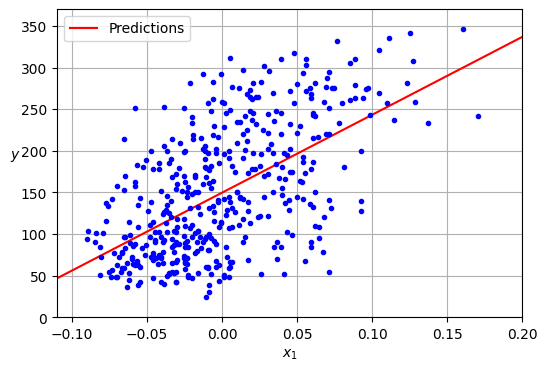

In [ ]:
from sklearn.preprocessing import add_dummy_feature

# 양쪽 끝 -0.15와 0.25 값을 X 값으로 선정
X_new = np.array([[-0.15], [0.25]])
# 절편을 더한값을 추가하기 위해 각 값에 1을 값으로 추가 [1,-0.15], [0.0.25]로 만듬
X_new_b = add_dummy_feature(X_new)
# 절편과 기울기를 배열로 정의
theta_best = np.array([[model.intercept_], model.coef_])
# 절편과 기울기를 곱함
y_predict = X_new_b @ theta_best

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-0.11, 0.2, 0, 370])
plt.grid()
plt.legend(loc="upper left")
#save_fig("linear_model_predictions_plot")
plt.show()


## 회귀 모델링 2차

In [ ]:
# Feature 선정
X = df[['bmi', 'bp', 's6']]
y = df['target']
# 학습/테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split (X, y, test_size=0.2,
random_state=42)
# 학습/평가 데이터 분리
train_X, val_X, train_y, val_y = train_test_split (train_X, train_y, test_size=0.4, random_state=42)
# 모델 학습
model = LinearRegression()
model.fit(train_X, train_y)
# 모델 성능 평가 (R^2)
print("훈련 데이터셋 R^2: {}".format(model.score(train_X, train_y)))
print("테스트 데이터셋 R^2: {}".format(model.score(test_X, test_y)))


훈련 데이터셋 R^2: 0.40393173961222073
테스트 데이터셋 R^2: 0.31674563191829963


In [ ]:
# 선형회귀식 계수 확인
print(model.coef_)
print(model.intercept_)

[692.88142066 329.50594833 245.39277773]
149.36046192976633


In [ ]:
# 모델 최종 성능 평가
print("테스트 데이터셋 R^2: {}".format(model.score(test_X, test_y)))

테스트 데이터셋 R^2: 0.31674563191829963


In [ ]:
from sklearn.metrics import r2_score
# R^2 스코어 직접 계산
y_pred = model.predict(test_X)
r2_score(test_y, y_pred)

0.31674563191829963

### 모델의 피쳐는 어떤것을 선택할까?

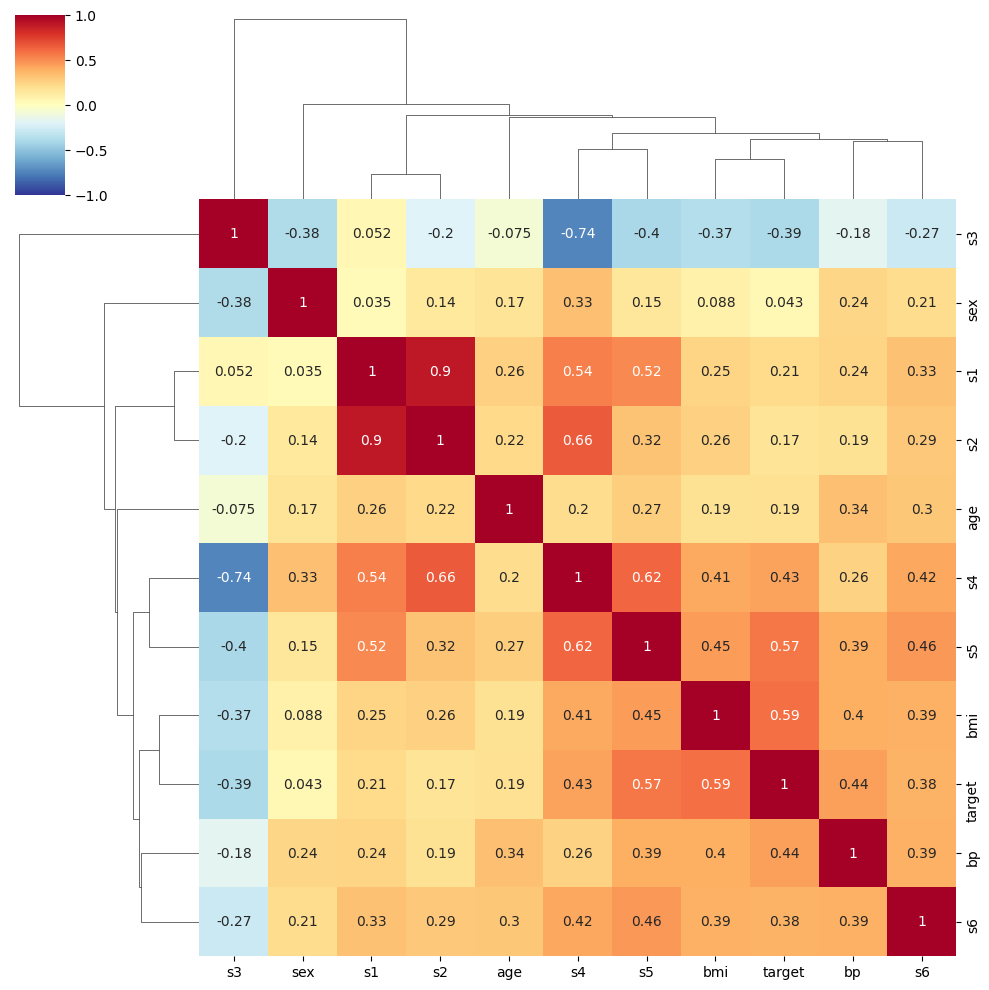

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#diabetes_data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
corr_matrix = df.corr(numeric_only=True)

sns.clustermap(corr_matrix,
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )


In [ ]:
corr_matrix["target"].sort_values(ascending=False)

,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


### 모델 피쳐 선택

In [ ]:
# Feature 선정
X = df[['bmi', 's5', 'bp']]
y = df['target']
# 학습/테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split (X, y, test_size=0.2,
random_state=42)
# 학습/평가 데이터 분리
train_X, val_X, train_y, val_y = train_test_split (train_X, train_y, test_size=0.4, random_state=42)
# 모델 학습
model = LinearRegression()
model.fit(train_X, train_y)
# 모델 성능 평가 (R^2)
print("훈련 데이터셋 R^2: {}".format(model.score(train_X, train_y)))
print("테스트 데이터셋 R^2: {}".format(model.score(test_X, test_y)))

훈련 데이터셋 R^2: 0.46382836757212387
테스트 데이터셋 R^2: 0.4691848614316003


# 분류

### 분류 알고리즘을 위한 데이터 준비

In [2]:
# 필요한 라이브러리 로드
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
# scikit-learn toy dataset 로드
# Classification 문제를 위한 와인 종류 분류 데이터셋을 로드
wine = datasets.load_wine()
# 데이터 프레임으로 변환
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
# 모델의 이해를 위해 Feature를 2개만 사용
X = df[['alcohol', 'malic_acid']]
y = df['target']

In [5]:
# 학습/테스트 데이터셋 분리
train_X, test_X, train_y, test_y = train_test_split (X, y, test_size=0.2, random_state=42)

In [6]:
# 학습/평가 데이터 분리
train_sub_X, val_X, train_sub_y, val_y = train_test_split (train_X, train_y, test_size=0.4, random_state=42)

In [7]:
# 모델 학습 (max_depth=2일 때)
model = DecisionTreeClassifier( max_depth=2, random_state=42)
model.fit(train_sub_X, train_sub_y)

DecisionTreeClassifier(max_depth=2, random_state=42)

**criterion** {“gini”, “entropy”, “log_loss”}, default=”gini”

- The function to measure the quality of a split.
- Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

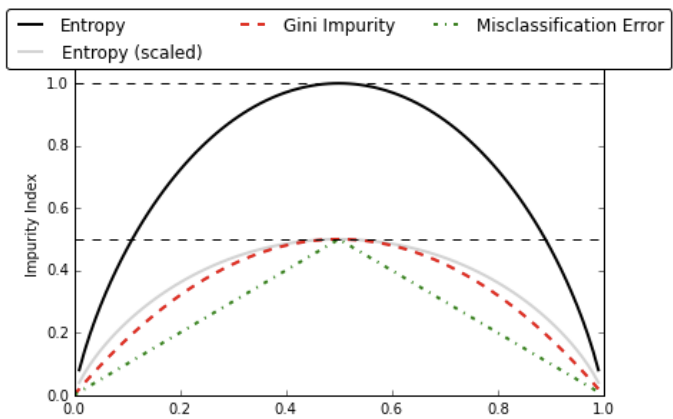

[Text(0.5, 0.8333333333333334, 'alcohol <= 12.755\ngini = 0.654\nsamples = 85\nvalue = [23.0, 36.0, 26.0]'),
 Text(0.25, 0.5, 'malic_acid <= 4.515\ngini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.202\nsamples = 35\nvalue = [0, 31, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'malic_acid <= 2.335\ngini = 0.586\nsamples = 48\nvalue = [23, 5, 20]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.435\nsamples = 29\nvalue = [21, 5, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.188\nsamples = 19\nvalue = [2, 0, 17]')]

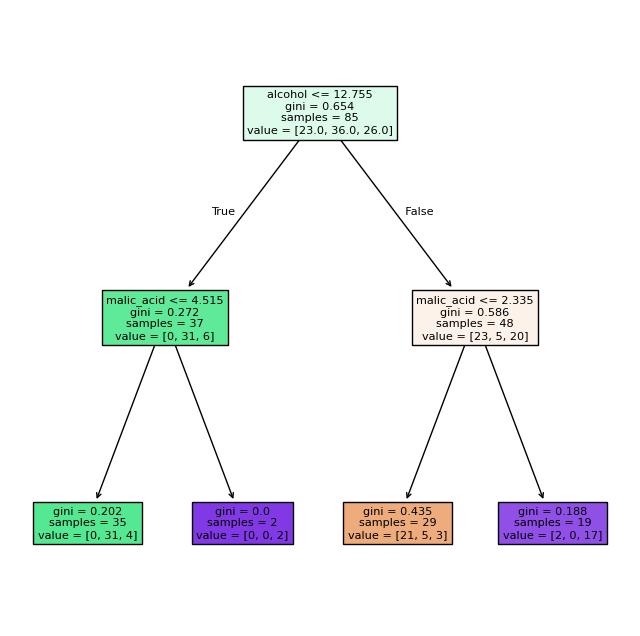

In [8]:
# 의사결정 나무 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(model, filled=True, feature_names=['alcohol', 'malic_acid'])

In [9]:
# 모델 평가
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))

훈련 데이터셋 accuracy: 0.8352941176470589
평가용 데이터셋 accuracy: 0.7719298245614035


In [10]:
# Cross Validation 5-Fold 각각의 결과
model_cv = DecisionTreeClassifier(max_depth=2, random_state=42)
scores= cross_validate(model_cv, train_X, train_y)
scores

{'fit_time': array([0.0047195 , 0.00390291, 0.00366044, 0.00257754, 0.00226903]),
 'score_time': array([0.0028944 , 0.00259924, 0.00235367, 0.00150895, 0.00147724]),
 'test_score': array([0.75862069, 0.68965517, 0.75      , 0.71428571, 0.82142857])}

In [11]:
# Cross Validation 평균 값
np.mean(scores['test_score'])

np.float64(0.7467980295566502)

In [12]:
# 모델 학습 (max_depth= None 일 때)
model = DecisionTreeClassifier(random_state=42)
model.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))


훈련 데이터셋 accuracy: 1.0
평가용 데이터셋 accuracy: 0.6140350877192983


In [13]:
# Grid Search로 최적의 파라미터 찾기
params = {'max_depth':[1, 2, 3, 4, 5]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params)
gs.fit(train_X, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5]})

In [14]:
# 제시한 하이퍼파라미터 중 최적의 파라미터 확인
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=42)

In [15]:
# Grid Search로 찾은 최적의 파라미터로 모델 선정하기
model = gs.best_estimator_

In [16]:
# 모델 평가
scores= cross_validate(model, train_X, train_y)
np.mean(scores['test_score'])


np.float64(0.7746305418719212)

In [17]:
print("테스트 데이터셋 accuracy: {}".format(model.score(test_X, test_y)))

테스트 데이터셋 accuracy: 0.8888888888888888


### RandomForest 적용하기

In [20]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_sub_X, train_sub_y)
print("훈련 데이터셋 accuracy: {}".format(model.score(train_sub_X, train_sub_y)))
print("평가용 데이터셋 accuracy: {}".format(model.score(val_X, val_y)))

훈련 데이터셋 accuracy: 1.0
평가용 데이터셋 accuracy: 0.7719298245614035


In [22]:
pred_y = model.predict(test_X)
accuracy_score(test_y, pred_y)

0.7777777777777778

### XGBoost 적용하기

In [26]:
# XGBoost 적용하기
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
model_xgb.fit(train_sub_X, train_sub_y)

print("XGBoost 훈련 데이터셋 accuracy: {}".format(model_xgb.score(train_sub_X, train_sub_y)))
print("XGBoost 평가용 데이터셋 accuracy: {}".format(model_xgb.score(val_X, val_y)))

XGBoost 훈련 데이터셋 accuracy: 1.0
XGBoost 평가용 데이터셋 accuracy: 0.6666666666666666


# 군집(Clustering)

In [ ]:
# 필요한 라이브러리 로드
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
# scikit-learn toy dataset 로드
# Clustering전용 데이터는 제공하고 있지 않아, iris 데이터를 사용
iris = datasets.load_iris()
# 데이터 프레임으로 변환
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
# (편의를 위해) 컬럼값 명을 변경하는 것 외에, 별다른 전처리는 수행하지 않는다. (결측치, 이상치, 명목형변수 등 없음)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
df


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### 데이터의 산포도 확인 (꽃받침)

Text(0, 0.5, 'sepal_width')

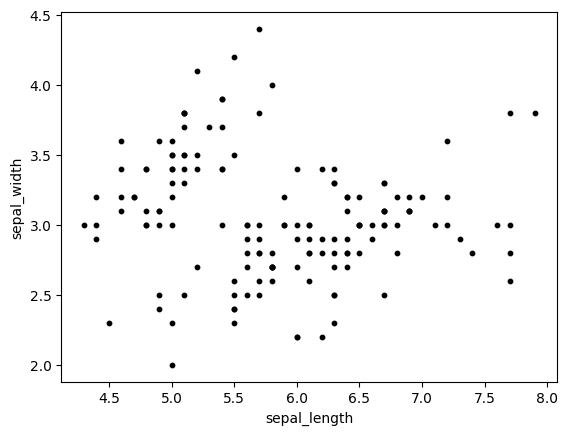

In [ ]:
import matplotlib.pyplot as plt
X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# 학습 결과 확인
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c="k", s=10)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

### 데이터의 산포도 확인 (꽃잎)

Text(0, 0.5, 'petal_width')

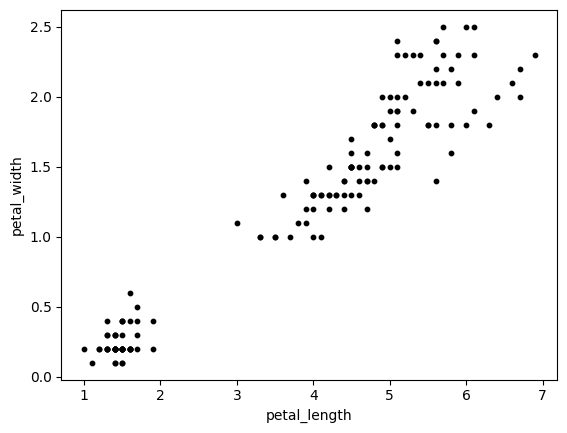

In [ ]:
# 학습 결과 확인
plt.scatter(X_train.iloc[:, 2], X_train.iloc[:, 3], c="k", s=10)
plt.xlabel("petal_length")
plt.ylabel("petal_width")

In [ ]:
# 학습, 테스트 데이터셋 분리
# 비지도 학습의 경우 모든 데이터가 학습에 사용되므로 분리하지 않는다.
X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [ ]:
# 모델 학습
model = KMeans(n_clusters=3)
model.fit(X_train)

KMeans(n_clusters=3)

In [ ]:
print ("각 클러스터 중심점 좌표: ", model.cluster_centers_)
print ("각 샘플의 label: ", model.labels_)
print ("중심으로부터의 거리의 합=Inertia: ", model.inertia_)
print ("반복 횟수: ", model.n_iter_)
print ("fit될 때까지 살펴본 feature의 수: ", model.n_features_in_)

각 클러스터 중심점 좌표:  [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
각 샘플의 label:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
중심으로부터의 거리의 합=Inertia:  78.85566582597727
반복 횟수:  7
fit될 때까지 살펴본 feature의 수:  4


Text(0, 0.5, 'petal_width')

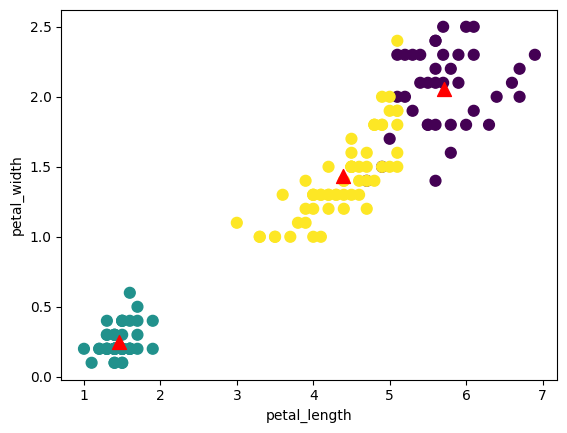

In [ ]:
# 학습 결과 확인
plt.scatter(X_train.iloc[:, 2], X_train.iloc[:, 3], c=model.labels_, s=60)
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], c=
'red', marker='^', s=100)
plt.xlabel("petal_length")
plt.ylabel("petal_width")

### 신규 데이터

In [ ]:
# 새로운 데이터로 predict
sample_new = [[4.5, 3.0, 1.5, 0.3]]
model.predict(sample_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [ ]:
# (잘 할당되었는지) 각 클러스터와의 거리 확인
def dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

for i in range(3):
    print ("클러스터 {}와의 거리: {}".format(i, dist(sample_new, model.cluster_centers_[i])))


클러스터 0와의 거리: 5.137309866332952
클러스터 1와의 거리: 0.6660180177742943
클러스터 2와의 거리: 3.4076316960415043


Text(0, 0.5, 'inertia')

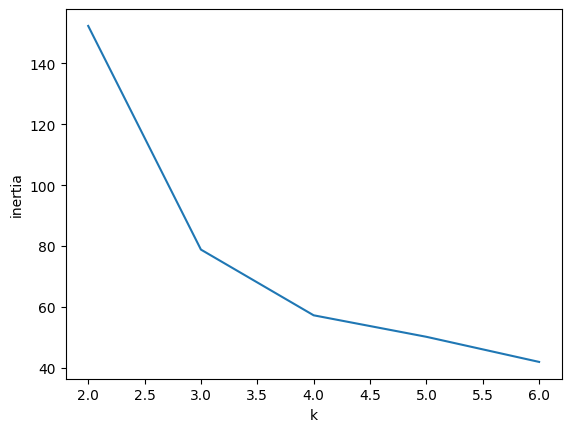

In [ ]:
# 최적의 K값 찾기 (엘보우 기법)
inertia = []
for k in range(2, 7):
    model_tmp = KMeans(n_clusters=k)
    model_tmp.fit(X_train)
    inertia.append(model_tmp.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')


### 추가 예제 - 5개의 원형 군집

#### Centroid 정하기

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 추가 코드 - make_blobs()의 정확한 인수는 중요하지 않습니다.
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.2]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

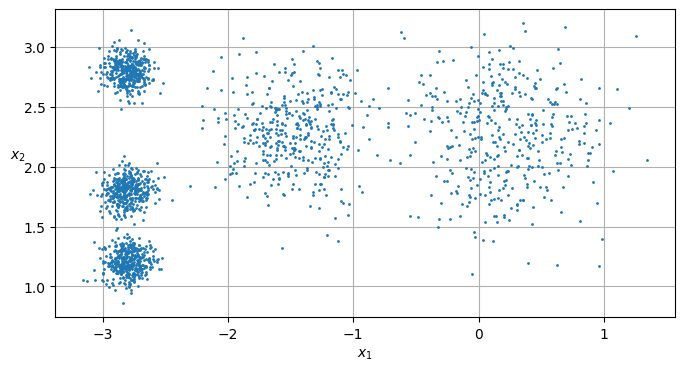

In [ ]:
# 산포도 분석

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

#### KMeans 군집

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, init='random', max_iter =1, n_init=1, random_state=0)
y_pred = kmeans.fit_predict(X)
centroids_1 = kmeans.cluster_centers_

#### 최초시작 군집

Text(0, 0.5, '$X_2$')

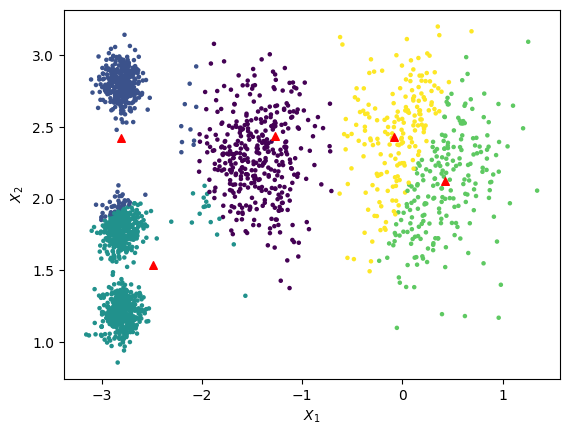

In [ ]:
# 학습 결과 확인
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='^', s=30)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

#### 1회 KMeans 수행 군집



랜덤시드(random_state)를 0으로도 하고 100으로도 해보자

In [ ]:
kmeans = KMeans(n_clusters=k, init='random', max_iter =1, n_init=1, random_state=110)
y_pred = kmeans.fit_predict(X)
centroids_1 = kmeans.cluster_centers_

#### 학습

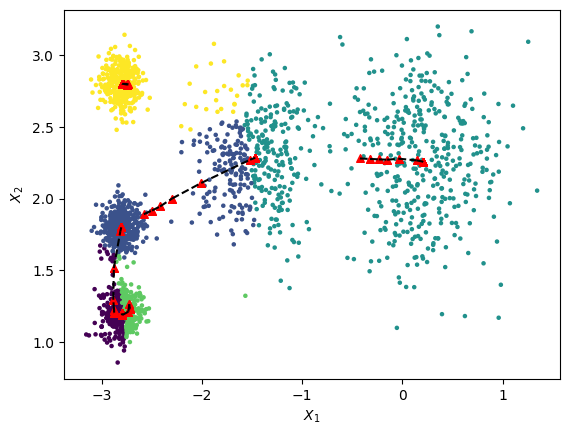

In [ ]:
# 학습 결과 확인
random_seed = 110  # 0 , 100, 110
kmeans2 = KMeans(n_clusters=k, init='random', max_iter =1, n_init=1, random_state=random_seed)
y_pred = kmeans2.fit_predict(X)
centroids_1 = kmeans2.cluster_centers_
centroids_2 = centroids_1

plt.scatter(X[:, 0], X[:, 1], c=kmeans2.labels_, s=5)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='red', marker='^', s=30)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

for i in range(100):
    kmeans2 = KMeans(n_clusters=k, init=centroids_1, max_iter =1, n_init=1, random_state=142)
    y_pred = kmeans2.fit_predict(X)
    for j in range(k):
      plt.plot([centroids_1[j, 0], centroids_2[j, 0]], [centroids_1[j, 1], centroids_2[j, 1]], 'k--')
    plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='red', marker='^', s=30)
    centroids_1 = centroids_2
    centroids_2 = kmeans2.cluster_centers_


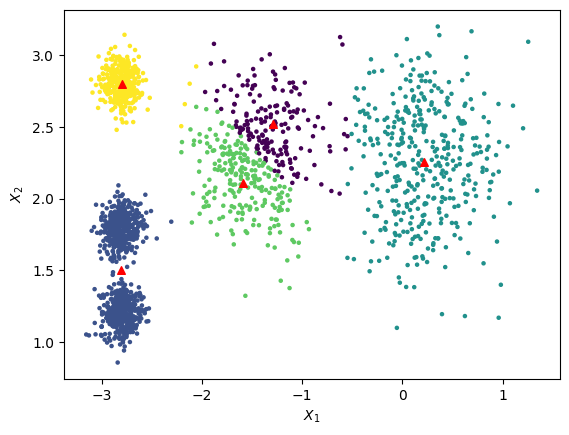

In [ ]:
# 학습 결과 확인
kmeans2 = KMeans(n_clusters=k, init='random', max_iter =100, n_init=1, random_state=100)
y_pred = kmeans2.fit_predict(X)
centroids_1 = kmeans2.cluster_centers_
centroids_2 = centroids_1

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

plt.scatter(X[:, 0], X[:, 1], c=kmeans2.labels_, s=5)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='red', marker='^', s=30)


### DBSCAN

Text(0, 0.5, 'y')

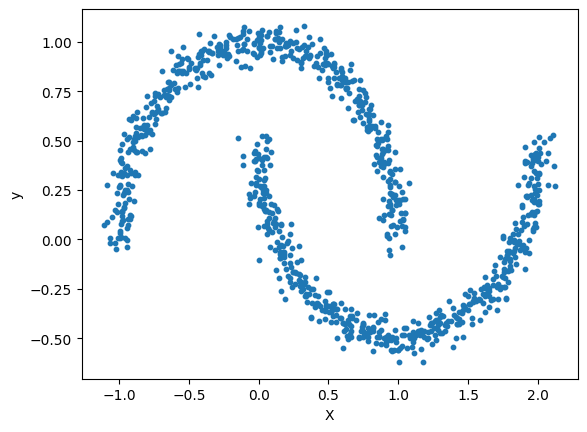

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.scatter(X[:,0], X[:, 1], s=10)
#plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], c='red', marker='^', s=100)
plt.xlabel("X")
plt.ylabel("y")

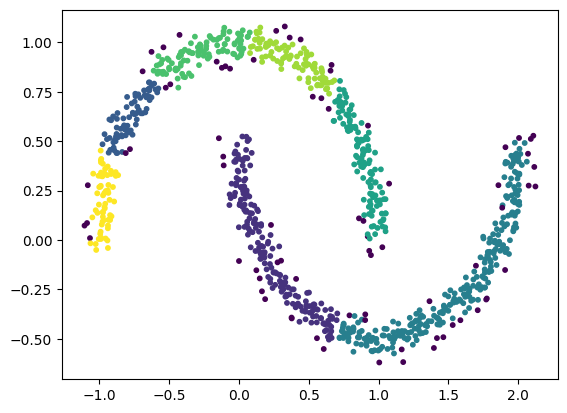

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
plt.scatter(X[:,0], X[:, 1], c=dbscan.labels_, s=10)

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

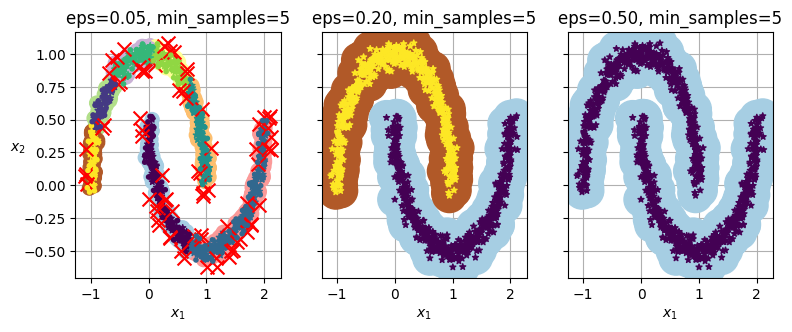

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)


plt.figure(figsize=(9, 3.2))

dbscan1 = DBSCAN(eps=0.05)
dbscan1.fit(X)

plt.subplot(131)
plot_dbscan(dbscan1, X, size=100)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.subplot(132)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

dbscan3 = DBSCAN(eps=0.5)
dbscan3.fit(X)
plt.subplot(133)
plot_dbscan(dbscan3, X, size=600, show_ylabels=False)

#save_fig("dbscan_plot")
plt.show()

In [ ]:
dbscan = dbscan2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])